# Reading Data
- research paper
- hill climb racing
- social Media

In [45]:
cd Desktop/RaghavendraGaleppa2019/ThinkChipBackend/ThinkChipBackend/

[Errno 2] No such file or directory: 'Desktop/RaghavendraGaleppa2019/ThinkChipBackend/ThinkChipBackend/'
/home/raghavendragaleppa/Desktop/RaghavendraGaleppa2019/ThinkChipBackend/ThinkChipBackend


In [0]:
from pathlib import Path
dataDir = Path('test_data/')

In [0]:
import os
import pickle
files = os.listdir(dataDir)
research_paper = []
hcl = []
social_media =[]
for f in files:
  if(f[-6:] != 'pickle'):
    continue
  with open(dataDir/f,'rb') as f_:
      data = pickle.load(f_)
  if(data.shape[0] < 60):
    continue
  if 'research_paper' in f:
      research_paper.append(data)
  if 'social_media' in f:
      social_media.append(data)
  if 'hcl' in f:
      hcl.append(data)


In [0]:
import numpy as np
hcl = np.asarray(hcl).squeeze()
social_media = np.asarray(social_media).squeeze()
research_paper = research_paper[1]

In [50]:
print(f"Reading Research Papaer: {research_paper.shape}")
print(f"Social Media: {social_media.shape}")
print(f"Hill Climb Racing: {hcl.shape}")

Reading Research Papaer: (600, 8, 250)
Social Media: (600, 8, 250)
Hill Climb Racing: (70, 8, 250)


# Get attention 

In [0]:
from widgets import ENG

In [52]:
eng = ENG(widget_path='test_data/')
eng.attention_matrix = []
eng.bandpower = []

test_data


### Getting attention for research paper data

In [53]:
# get the indices to every 5th epoch
import config
config.reset_filter_states()
idx = list(range(0,research_paper.shape[0],5))
eng.attention_matrix = []
eng.bandpower = []
for i in range(len(idx)-1):
  eng.get_attention(research_paper[idx[i]:idx[i+1]],keep_bad_epochs=True)

research_paper_atten = eng.attention_matrix
research_paper_atten = np.asarray(research_paper_atten).squeeze()
research_paper_band = np.asarray(eng.bandpower)

/usr/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 500 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))


### Getting attention for social paper data

In [0]:
# get the indices to every 5th epoch
config.reset_filter_states()
idx = list(range(0,social_media.shape[0],5))
eng.attention_matrix = []
eng.bandpower =[]
for i in range(len(idx)-1):
  eng.get_attention(social_media[idx[i]:idx[i+1]],keep_bad_epochs=True)

social_media_atten = eng.attention_matrix
social_media_atten = np.asarray(social_media_atten).squeeze()
social_media_band = np.asarray(eng.bandpower)

### Getting attention for hill climb racing data

In [0]:
# get the indices to every 5th epoch
config.reset_filter_states()
idx = list(range(0,hcl.shape[0],5))
eng.attention_matrix = []
eng.bandpower = []
for i in range(len(idx)-1):
  eng.get_attention(hcl[idx[i]:idx[i+1]],keep_bad_epochs=True)

hcl_atten = eng.attention_matrix
hcl_atten = np.asarray(hcl_atten).squeeze()
hcl_band = np.asarray(eng.bandpower)

### Plot bandpower of all 3 data's

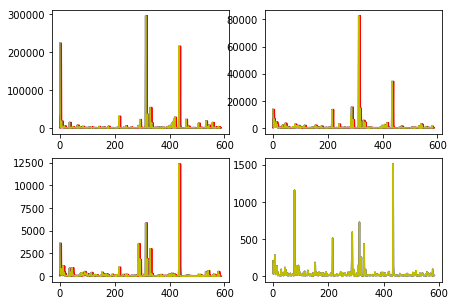

In [56]:
# create 4 subplots for 4 bands
import matplotlib.pyplot as plt
%matplotlib qt
fig,ax = plt.subplots(2,2,figsize=(7,5))
#fig.subplots_adjust(wspace=0.6,hspace=0.6)
ax = ax.reshape(-1)

# First plot research_paper bandpower with color red
research_paper_band = research_paper_band.squeeze()
research_paper_band = research_paper_band[5:]
ax[0].plot(research_paper_band[:,0],label='delta',c='r')
ax[1].plot(research_paper_band[:,1],label='delta',c='r')
ax[2].plot(research_paper_band[:,2],label='delta',c='r')

social_media_band = research_paper_band.squeeze()
social_media_band = social_media_band[5:]
ax[0].plot(social_media_band[:,0],label='delta',c='b')
ax[1].plot(social_media_band[:,1],label='delta',c='b')
ax[2].plot(social_media_band[:,2],label='delta',c='b')
ax[3].plot(social_media_band[:,3],label='delta',c='b')

hcl_band = research_paper_band.squeeze()
hcl_band = hcl_band[5:]
ax[0].plot(hcl_band[:,0],label='delta',c='y')
ax[1].plot(hcl_band[:,1],label='delta',c='y')
ax[2].plot(hcl_band[:,2],label='delta',c='y')
ax[3].plot(hcl_band[:,3],label='delta',c='y')

In [0]:

hcl_band = research_paper_band.squeeze()
hcl_band = hcl_band[5:]
ax[0].plot(hcl_band[:,0],label='delta',c='r')
ax[1].plot(hcl_band[:,1],label='delta',c='r')
ax[2].plot(hcl_band[:,2],label='delta',c='r')
ax[3].plot(hcl_band[:,3],label='delta',c='r')

plt.show()